In [33]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
clinical_data = pd.read_csv(clinical_trial_data_to_load)
mouse_data = pd.read_csv(mouse_drug_data_to_load)


In [34]:
mouse_data.head()

#delete data of g989 since there are dupliate record for this mouse 
mouse_data=mouse_data[mouse_data["Mouse ID"]!="g989"]
mouse_data.count()

Mouse ID    248
Drug        248
dtype: int64

In [35]:
clinical_data.head()

#delete data of g989 since there are dupliate record for this mouse 
clinical_data=clinical_data[clinical_data["Mouse ID"]!="g989"]
clinical_data["Mouse ID"].count()

1880

In [36]:
# Combine the data into a single dataset
combined_data = pd.merge(clinical_data, mouse_data, how="inner", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = combined_data.groupby(['Drug', 'Timepoint']) 
output_df_mean = mean_tumor_volume['Tumor Volume (mm3)'].mean()
output_df_mean.head()

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
Name: Tumor Volume (mm3), dtype: float64

In [6]:
# Convert to DataFrame
mean_df = pd.DataFrame(output_df_mean)
mean_df = mean_df.reset_index()

# Preview DataFrame
mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor = mean_tumor_volume.sem()['Tumor Volume (mm3)']


In [8]:
# Convert to DataFrame
se_df = pd.DataFrame(sem_tumor).reset_index()
# Preview DataFrame
se_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [9]:
# Minor Data Munging to Re-Format the Data Frames using pivot
se_df_pivot = se_df.pivot(index='Timepoint', columns='Drug')

# get rid of the first layer of indexing
se_df_pivot =se_df_pivot["Tumor Volume (mm3)"]
se_df_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.241842,0.482955,0.254830,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.388701,0.720225,0.461474,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.502024,0.770432,0.532904,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.607412,0.786199,0.684670,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.622040,0.746991,0.784320,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.807055,0.864906,0.952984,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.181202,0.967433,1.072411,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [10]:
# creat mean pivot
mean_df_pivot = mean_df.pivot(index='Timepoint', columns='Drug')

# get rid of the first layer of indexing
mean_df_pivot = mean_df_pivot["Tumor Volume (mm3)"]
mean_df_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.462490,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.122548,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.103457,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


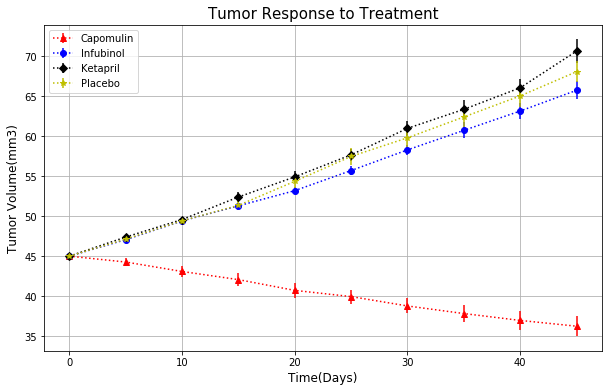

In [44]:
# Generate the Plot (with Error Bars) for tumor volume thru time
plt.figure(figsize=(10,6))
plt.errorbar(se_df_pivot.index,mean_df_pivot["Capomulin"], se_df_pivot["Capomulin"],fmt="^",ls="dotted",c="r")
plt.errorbar(se_df_pivot.index,mean_df_pivot["Infubinol"], se_df_pivot["Infubinol"],fmt="o",ls="dotted",c="b")
plt.errorbar(se_df_pivot.index,mean_df_pivot["Ketapril"], se_df_pivot["Ketapril"],fmt="D",ls="dotted",c="k")
plt.errorbar(se_df_pivot.index,mean_df_pivot["Placebo"], se_df_pivot["Placebo"],fmt="*",ls="dotted",c="y")

plt.title("Tumor Response to Treatment",fontsize=15)
plt.xlabel("Time(Days)",fontsize=12)
plt.ylabel("Tumor Volume(mm3)",fontsize=12)
plt.grid()
plt.legend(loc="best")

# Save the Figure
plt.savefig("Tumor_Response_to_Treatment.png")


# Show the Figure
plt.show()

#### Based on the chart, Capomulin is the only drug that resulted in tumor volume decreasing over time; Mice treated by Infubinol, Ketapril and Placebo experenced increasing in tumor volume at similar rates.

## Metastatic Response to Treatment

In [13]:
# view the data
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [14]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_group = combined_data.groupby(["Drug","Timepoint"])
output_mean_met = met_group.mean()["Metastatic Sites"]
# Convert to DataFrame
mean_met_df = pd.DataFrame(output_mean_met).reset_index()
# Preview DataFrame
mean_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [15]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
output_se_met = met_group["Metastatic Sites"].sem()
output_se_met
# Convert to DataFrame
se_met_df = pd.DataFrame(output_se_met).reset_index()
# Preview DataFrame
se_met_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [16]:
# Minor Data Munging to Re-Format the Data Frames
met_mean_pivot=mean_met_df.pivot(index="Timepoint",columns="Drug")
# Preview that Reformatting worked
met_mean_pivot=met_mean_pivot["Metastatic Sites"]
met_mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.347826,0.120000,0.260870,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.619048,0.250000,0.523810,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.800000,0.333333,0.809524,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.947368,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.384615,0.652174,1.166667,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.666667,0.782609,1.411765,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.333333,0.952381,1.533333,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [17]:
# create pivot tale for se data in the same way
met_se_pivot = se_met_df.pivot(index="Timepoint",columns="Drug")
met_se_pivot=met_se_pivot["Metastatic Sites"]

met_se_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.101543,0.066332,0.093618,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.108588,0.090289,0.131277,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.144749,0.115261,0.163577,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.195180,0.119430,0.222607,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.212990,0.119430,0.232210,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.284268,0.139968,0.243426,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.408248,0.145997,0.255728,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


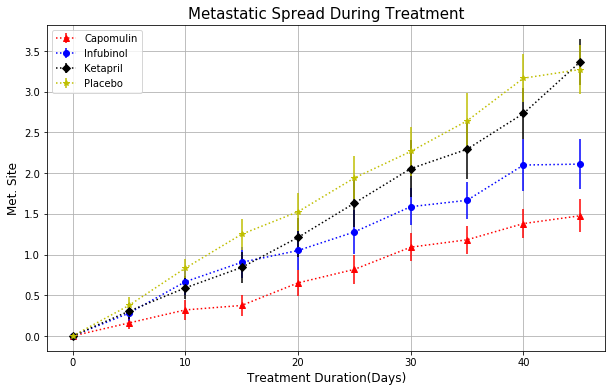

In [43]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(10,6))

plt.errorbar(x=met_mean_pivot.index,y=met_mean_pivot["Capomulin"],yerr=met_se_pivot["Capomulin"],c="r",fmt="^",ls="dotted")
plt.errorbar(x=met_mean_pivot.index,y=met_mean_pivot["Infubinol"],yerr=met_se_pivot["Infubinol"],c="b",fmt="o",ls="dotted")
plt.errorbar(x=met_mean_pivot.index,y=met_mean_pivot["Ketapril"],yerr=met_se_pivot["Ketapril"],c="k",fmt="D",ls="dotted")
plt.errorbar(x=met_mean_pivot.index,y=met_mean_pivot["Placebo"],yerr=met_se_pivot["Placebo"],c="y",fmt="*",ls="dotted")

plt.grid()
plt.title("Metastatic Spread During Treatment",fontsize=15)
plt.xlabel("Treatment Duration(Days)",fontsize=12)
plt.ylabel("Met. Site",fontsize=12)
plt.legend(loc="best")

# Save the Figure
plt.savefig("Metastatic_Spread_During_Treatment.png")

# Show the Figure
plt.show()

#### The metastatic spreads during treatment in all groups of mice, but the group treated by Capomulin had the lowest spread rate, followed by te group treated by Infubinol.

## Survival Rates

In [20]:
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [21]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
srate_group=combined_data.groupby(["Drug","Timepoint"])
output_srate = srate_group["Mouse ID"].count()
# Convert to DataFrame
srate_df = pd.DataFrame(output_srate).reset_index()
# Preview DataFrame
srate_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [22]:
# Minor Data Munging to Re-Format the Data Frames
srate_pivot=srate_df.pivot(index="Timepoint",columns="Drug")
# Preview the Data Frame
srate_pivot = srate_pivot["Mouse ID"]
srate_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,24,25,24,25
5,25,21,25,23,23,24,23,25,23,24
10,25,20,21,22,21,24,21,24,21,22
15,24,19,21,19,21,20,15,24,21,21
20,23,18,20,19,20,19,15,23,19,17
25,22,18,18,19,18,17,13,23,18,16
30,22,16,17,18,15,15,12,23,17,15
35,22,14,12,17,15,14,9,21,15,14
40,21,14,10,15,15,12,9,20,12,14


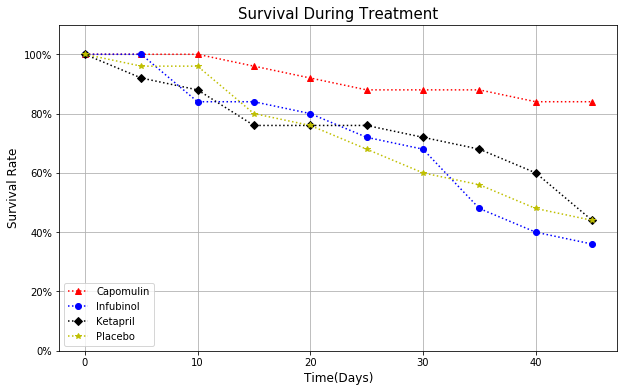

In [42]:
# Generate the Plot (Accounting for percentages)
fig,ax=plt.subplots(figsize=(10,6))

ax.plot(srate_pivot.index,srate_pivot["Capomulin"]/srate_pivot.loc[0,"Capomulin"]*100,marker="^",c="r",ls="dotted")
ax.plot(srate_pivot.index,srate_pivot["Infubinol"]/srate_pivot.loc[0,"Infubinol"]*100,marker="o",c="b",ls="dotted")
ax.plot(srate_pivot.index,srate_pivot["Ketapril"]/srate_pivot.loc[0,"Ketapril"]*100,marker="D",c="k",ls="dotted")
ax.plot(srate_pivot.index,srate_pivot["Placebo"]/srate_pivot.loc[0,"Placebo"]*100,marker="*",c="y",ls="dotted")

# reset y axis scale
ax.set_ylim(0,110)

# format y ticks
ytick=np.arange(0,110,20)
yticks=["{:.0f}%".format(i) for i in ytick]
ax.set_yticklabels(yticks)

# format figure
plt.title("Survival During Treatment",fontsize=15)
plt.xlabel("Time(Days)",fontsize=12)
plt.ylabel("Survival Rate",fontsize=12)
plt.grid()
plt.legend(loc=3)

#Save the figure
plt.savefig("Survival_During_Treatment.png")

# Show the Figure
plt.show()

#### Mice treated by Capomulin had the highest survival rate throughout the treatment period, and over 80% of mice in this group remained alive at then end of 45 days, which is a ignifically higher than the survival rate of the other three groups (around 40%).

## Summary Bar Graph

In [25]:
# view data
mean_df_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.462490,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.122548,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.103457,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [26]:
# Calculate the percent changes for each drug
difference = mean_df_pivot.loc[45,:]-mean_df_pivot.loc[0,:]
perc_change = 100*difference/mean_df_pivot.loc[0,:]
# Display the data to confirm
perc_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [27]:
# convert into DataFrame format
per_change_df = pd.DataFrame(perc_change,columns=["percent_change"])
# get the data for the 4 drugs of interest
per_change_df=per_change_df.loc[["Capomulin","Infubinol","Ketapril","Placebo"],:]

In [28]:
# Splice the data between passing and failing drugs
decreased = per_change_df.loc[per_change_df["percent_change"]<0,:]
decreased

,percent_change
Drug,
Capomulin,-19.475303


In [29]:
# Splice the data between passing and failing drugs
increased = per_change_df.loc[per_change_df["percent_change"]>=0,:]
increased

,percent_change
Drug,
Infubinol,46.123472
Ketapril,57.028795
Placebo,51.297960


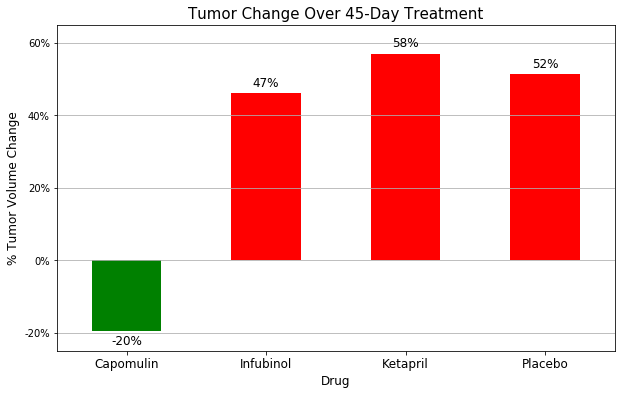

In [41]:
# Make bar chart
bar_plot=per_change_df.plot(kind="bar",color="grrr",legend=False,figsize=(10,6))
plt.grid(axis="y")

plt.ylim(-25,65)

# update yticks
yticks = ["{:.0f}%".format(i) for i in np.arange(-20,80,20)]
plt.yticks(np.arange(-20,80,20),yticks)

#add data label fot each bar

rects=bar_plot.patches # get rects values

## For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()+1
    x_value = rect.get_x() + rect.get_width() / 2

    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        # Invert space to place label below
        y_value-=2
        # Vertically align label at top
        va = "top"

    # Use Y value as label and format number as percentage
    label = "{:.0f}%".format(y_value)

    # Create data label
    plt.text(x_value, y_value,
        label,                      # Use `label` as label
        ha='center',                # Horizontally center label
        va=va,
        fontsize=12) 

# format the figure
plt.title("Tumor Change Over 45-Day Treatment",fontsize=15)
plt.ylabel("% Tumor Volume Change",fontsize=12)
plt.xlabel("Drug",fontsize=12)
plt.xticks(rotation=0,fontsize=12)

# Save the Figure
plt.savefig("Tumor_Change_Over_45-Day_Treatment.png")

# show the figure
plt.show()
